In [5]:
#these first few cells are only to descibe the data, skip below

import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
#just importing data here, dont worry about this block

adata = sc.read_h5ad('../complete_class/integrated.h5ad')

def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,condition
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID19
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID19
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID19
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID19
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID19
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID19
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID19
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID19


/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


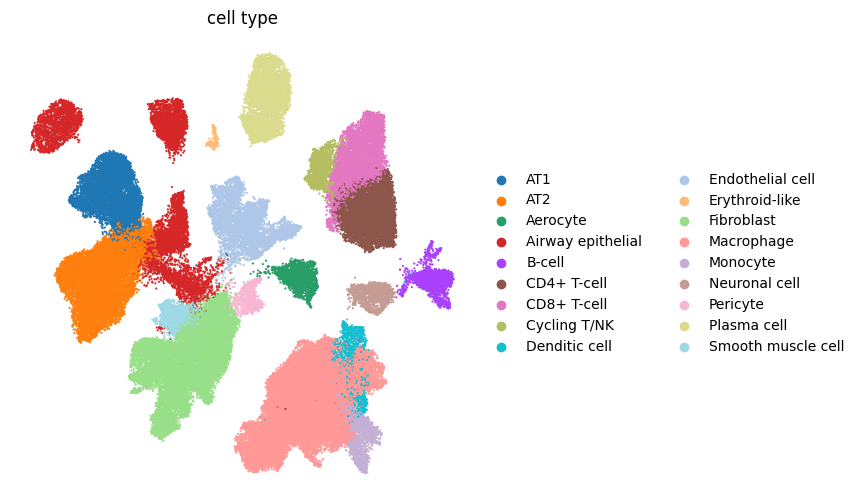

In [7]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['cell type'], frameon = False, s = 10)

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


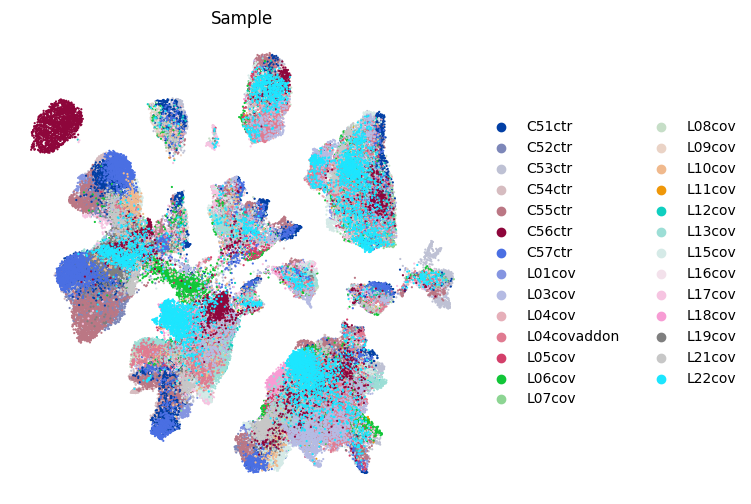

In [8]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['Sample'], frameon = False, s = 10)

# tutorial starts here

In [9]:
import scanpy as sc
import pandas as pd
import random
import numpy as np

In [10]:
adata

AnnData object with n_obs × n_vars = 98979 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'condition'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [11]:
cell_subset = adata[adata.obs['cell type'] == 'Macrophage']
cell_subset

View of AnnData object with n_obs × n_vars = 23406 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'condition'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

The goal is to subset your data into the individual sample then sum the values for each cell into one sample

In [36]:
#example without pseudo replicates
pbs = []
for sample in cell_subset.obs.Sample.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts'] #make sure to use raw data
    
    rep_adata = sc.AnnData(X = samp_cell_subset.X.sum(axis = 0),
                           var = samp_cell_subset.var[[]])
    
    rep_adata.obs_names = [sample]
    rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
    
    pbs.append(rep_adata)

In [37]:
pb = sc.concat(pbs)

In [32]:
#example WITH pseudo replicates
pbs = []
for sample in cell_subset.obs.Sample.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts'] #make sure to use raw data
    
    
    
    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 2) #change number here for number of replicates deisred
    
    for i, pseudo_rep in enumerate(indices):
    
        rep_adata = sc.AnnData(X = samp_cell_subset[indices[i]].X.sum(axis = 0),
                               var = samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)

In [38]:
pb = sc.concat(pbs)

In [39]:
pb.obs

,condition
L08cov,COVID19
C54ctr,control
C53ctr,control
L01cov,COVID19
L11cov,COVID19
C52ctr,control
L09cov,COVID19
C55ctr,control
C51ctr,control
L16cov,COVID19


In [47]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [48]:
counts = pd.DataFrame(pb.X, columns = pb.var_names) #need to do this to pass var names

In [50]:
dds = DeseqDataSet(
    counts = counts,
    clinical=pb.obs,
    design_factors="condition")

#design_factors=["batch", "condition"] = ~ batch + condtion

In [51]:
dds

AnnData object with n_obs × n_vars = 27 × 20631
    obs: 'condition'
    obsm: 'design_matrix'

In [52]:
sc.pp.filter_genes(dds, min_cells = 1)

In [53]:
dds

AnnData object with n_obs × n_vars = 27 × 20492
    obs: 'condition'
    var: 'n_cells'
    obsm: 'design_matrix'

In [54]:
dds.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.48 seconds.

Fitting dispersion trend curve...
... done in 4.58 seconds.

Fitting MAP dispersions...
... done in 1.80 seconds.

Fitting LFCs...
... done in 1.20 seconds.

Refitting 115 outliers.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.04 seconds.



/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


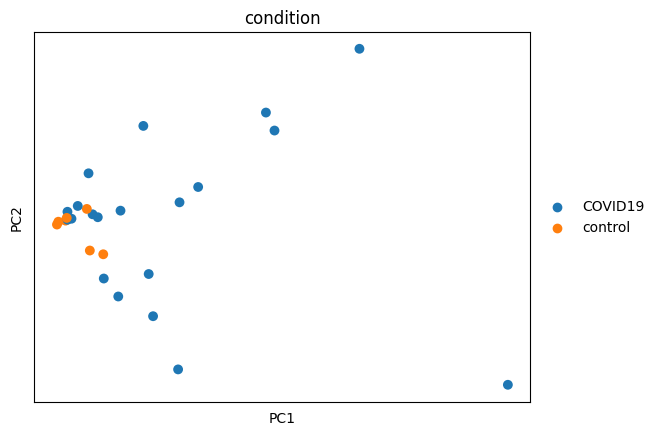

In [55]:
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'condition', size = 200)

In [56]:
stat_res = DeseqStats(dds, n_cpus=8, contrast=('condition', 'COVID19', 'control'))
    
stat_res.summary()

Running Wald tests...
... done in 2.52 seconds.

Log2 fold change & Wald test p-value: condition COVID19 vs control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
AL627309.1,1.382000,0.310452,0.885121,0.350745,0.725780,0.847554
AL627309.5,4.050539,-0.059828,0.500974,-0.119424,0.904940,0.950763
LINC01409,16.377067,-1.078064,0.241999,-4.454826,0.000008,0.000407
LINC01128,17.782750,0.609038,0.477520,1.275417,0.202162,0.400452
LINC00115,1.855421,0.427311,0.688274,0.620845,0.534702,0.716063
...,...,...,...,...,...,...
DDX3Y,44.589046,0.081561,1.342070,0.060773,0.951540,0.974434
NLGN4Y,1.702836,-3.091723,0.000000,0.000000,NaN,NaN
AC011751.1,0.113665,0.055716,2.824324,0.019727,0.984261,NaN
AC010889.1,0.332641,0.876414,1.834553,0.477726,0.632845,NaN


In [57]:
de  = stat_res.results_df

In [59]:
de.sort_values('stat', ascending = False)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ACVR1,91.696470,3.021761,0.347601,8.693186,3.524161e-18,5.540686e-14
CEBPB,316.437173,2.178902,0.270498,8.055137,7.938972e-16,4.160551e-12
TPST1,309.890596,4.392460,0.571235,7.689412,1.478127e-14,3.319874e-11
DONSON,31.967121,5.300522,0.719410,7.367879,1.733640e-13,3.028477e-10
ADAMTS2,242.743167,4.397479,0.619423,7.099311,1.253808e-12,1.792034e-09
...,...,...,...,...,...,...
SLC24A1,23.005642,-1.625455,0.214716,-7.570249,3.725107e-14,7.320767e-11
MED12L,13.343628,-5.873427,0.755237,-7.776934,7.430355e-15,1.947001e-11
AL133415.1,40.644938,-2.600512,0.333948,-7.787175,6.852412e-15,1.947001e-11
AC009318.1,22.904595,-1.791047,0.225642,-7.937556,2.062032e-15,8.104817e-12
